[View in Colaboratory](https://colab.research.google.com/github/gatchaman-20140215/machine-learning/blob/master/Google%20Colaboratory/keras_nn_cnn_rnn.ipynb)

# データの準備

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.model_selection import train_test_split
import numpy as np

mnist = input_data.read_data_sets("MNIST_data/")

X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X_train, Y_train, test_size=4000)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_validation.shape)
print(Y_validation.shape)

(51000, 784)
(51000,)
(10000, 784)
(10000,)
(4000, 784)
(4000,)


この画像データのラベルは3です。


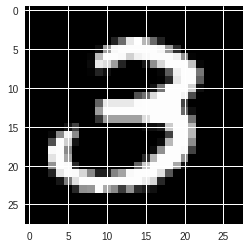

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.array(X_train[0], dtype=np.float32).reshape(28, 28), cmap='gray')
print('この画像データのラベルは{:0d}です。'.format(Y_train[0]))

## 1-of-k表現に変換

In [0]:
Y_train = np.eye(10)[Y_train.astype(int)]
Y_test = np.eye(10)[Y_test.astype(int)]
Y_validation = np.eye(10)[Y_validation.astype(int)]

# ニューラルネットワーク

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping
from keras import backend

Using TensorFlow backend.


## モデル設定

In [6]:
n_in = len(X_train[0])
n_hidden = 200
n_out = len(Y_train[0])

model = Sequential()
model.add(Dense(n_hidden, input_dim=n_in))
model.add(Activation('relu'))

model.add(Dense(n_hidden))
model.add(Activation('relu'))

model.add(Dense(n_out))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


## モデル学習

In [7]:
epochs = 300
batch_size = 100

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

hist = model.fit(X_train, Y_train, epochs=epochs,
                 batch_size=batch_size,
                 validation_data=(X_validation, Y_validation),
                 callbacks=[early_stopping])

Train on 51000 samples, validate on 4000 samples
Epoch 1/300
51000/51000 [==============================] - 4s 69us/step - loss: 1.2016 - acc: 0.7145 - val_loss: 0.5900 - val_acc: 0.8497
Epoch 2/300
51000/51000 [==============================] - 3s 51us/step - loss: 0.4635 - acc: 0.8798 - val_loss: 0.4182 - val_acc: 0.8802
Epoch 3/300
51000/51000 [==============================] - 3s 50us/step - loss: 0.3651 - acc: 0.8995 - val_loss: 0.3602 - val_acc: 0.8980
Epoch 4/300
51000/51000 [==============================] - 3s 50us/step - loss: 0.3229 - acc: 0.9100 - val_loss: 0.3282 - val_acc: 0.9070
Epoch 5/300
51000/51000 [==============================] - 3s 51us/step - loss: 0.2959 - acc: 0.9166 - val_loss: 0.3079 - val_acc: 0.9118
Epoch 6/300
51000/51000 [==============================] - 3s 50us/step - loss: 0.2753 - acc: 0.9223 - val_loss: 0.2876 - val_acc: 0.9157
Epoch 7/300
51000/51000 [==============================] - 3s 50us/step - loss: 0.2589 - acc: 0.9276 - val_loss: 0.2732 - v

## 学習曲線

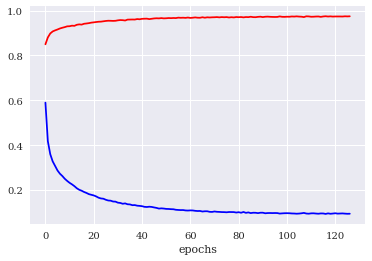

In [8]:
acc = hist.history['val_acc']
loss = hist.history['val_loss']

plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(len(loss)), loss, label='loss', color='blue')
plt.plot(range(len(acc)), acc, label='acc', color='red')
plt.xlabel('epochs')
plt.show()

## 予測精度の評価

In [9]:
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 66us/step
[0.07168153105271048, 0.9778]


この画像データのラベルは3です。


array([[0.00000000788268739171, 0.00000000027212274101,
        0.00000182624910394225, 0.99998569488525390625,
        0.00000000000230626889, 0.00000038970770788183,
        0.00000000000011150467, 0.00000000041174075260,
        0.00000760536704547121, 0.00000458146223536460]], dtype=float32)

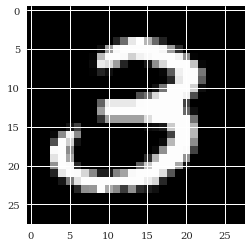

In [10]:
plt.imshow(np.array(X_train[0], dtype=np.float32).reshape(28, 28), cmap='gray')
print('この画像データのラベルは{:0d}です。'.format(np.argmax(Y_train[0])))

predict = model.predict(X_train[0:1], batch_size=1)
np.set_printoptions(precision=20, floatmode='fixed', suppress=True)
predict

# 畳み込みニューラルネットワーク

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_validation = X_validation.reshape(X_validation.shape[0], 28, 28, 1)

## モデル設定

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                36928     
__________

## モデル学習

In [14]:
epochs = 300
batch_size = 100

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

hist = model.fit(X_train, Y_train, epochs=epochs,
                 batch_size=batch_size,
                 validation_data=(X_validation, Y_validation),
                 callbacks=[early_stopping])

Train on 51000 samples, validate on 4000 samples
Epoch 1/300
51000/51000 [==============================] - 7s 139us/step - loss: 1.0894 - acc: 0.6954 - val_loss: 0.4037 - val_acc: 0.8715
Epoch 2/300
51000/51000 [==============================] - 6s 123us/step - loss: 0.3256 - acc: 0.9009 - val_loss: 0.2859 - val_acc: 0.9105
Epoch 3/300
51000/51000 [==============================] - 6s 124us/step - loss: 0.2253 - acc: 0.9322 - val_loss: 0.2033 - val_acc: 0.9378
Epoch 4/300
51000/51000 [==============================] - 6s 124us/step - loss: 0.1716 - acc: 0.9484 - val_loss: 0.1638 - val_acc: 0.9460
Epoch 5/300
51000/51000 [==============================] - 6s 124us/step - loss: 0.1409 - acc: 0.9575 - val_loss: 0.1365 - val_acc: 0.9558
Epoch 6/300
51000/51000 [==============================] - 6s 123us/step - loss: 0.1198 - acc: 0.9641 - val_loss: 0.1178 - val_acc: 0.9600
Epoch 7/300
51000/51000 [==============================] - 6s 123us/step - loss: 0.1045 - acc: 0.9680 - val_loss: 0.1

## 学習曲線

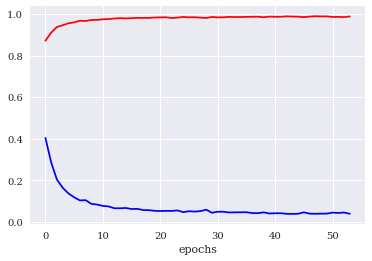

In [15]:
acc = hist.history['val_acc']
loss = hist.history['val_loss']

plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(len(loss)), loss, label='loss', color='blue')
plt.plot(range(len(acc)), acc, label='acc', color='red')
plt.xlabel('epochs')
plt.show()

## 予測精度の評価

In [16]:
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 107us/step
[0.037091853324585825, 0.9879]


この画像データのラベルは3です。


array([[0.00000000000000142575, 0.00000000000000055516,
        0.00003081574323005043, 0.99996912479400634766,
        0.00000000000000000163, 0.00000000003253877723,
        0.00000000000000000003, 0.00000000000156541327,
        0.00000002436952506457, 0.00000000206656181057]], dtype=float32)

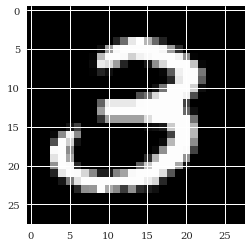

In [17]:
plt.imshow(np.array(X_train[0], dtype=np.float32).reshape(28, 28), cmap='gray')
print('この画像データのラベルは{:0d}です。'.format(np.argmax(Y_train[0])))

predict = model.predict(X_train[0:1], batch_size=1)
np.set_printoptions(precision=20, floatmode='fixed', suppress=True)
predict

# リカレントニューラルネットワーク

In [0]:
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [0]:
X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X_train, Y_train, test_size=4000)

## 1-of-k表現に変換

In [0]:
Y_train = np.eye(10)[Y_train.astype(int)]
Y_test = np.eye(10)[Y_test.astype(int)]
Y_validation = np.eye(10)[Y_validation.astype(int)]

## モデル設定

In [0]:
from keras.layers.wrappers import Bidirectional
from keras.layers.recurrent import LSTM

In [0]:
n_in = 28
n_time = 28
n_hidden = 128
n_out = 10

In [0]:
def weight_variable(shape, name=None):
    return np.random.normal(scale=.01, size=shape)

In [25]:
model = Sequential()
model.add(Bidirectional(LSTM(n_hidden), input_shape=(n_time, n_in)))
model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 256)               160768    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 163,338
Trainable params: 163,338
Non-trainable params: 0
_________________________________________________________________


## モデル学習

In [0]:
epochs = 300
batch_size = 250

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

hist = model.fit(X_train, Y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_validation, Y_validation),
                 callbacks=[early_stopping])

Train on 51000 samples, validate on 4000 samples
Epoch 1/300
51000/51000 [==============================] - 27s 538us/step - loss: 0.8864 - acc: 0.6984 - val_loss: 0.2940 - val_acc: 0.9095
Epoch 2/300
51000/51000 [==============================] - 26s 516us/step - loss: 0.2314 - acc: 0.9294 - val_loss: 0.1822 - val_acc: 0.9440
Epoch 3/300
51000/51000 [==============================] - 26s 517us/step - loss: 0.1437 - acc: 0.9565 - val_loss: 0.1262 - val_acc: 0.9617
Epoch 4/300
51000/51000 [==============================] - 26s 514us/step - loss: 0.1124 - acc: 0.9657 - val_loss: 0.1003 - val_acc: 0.9685
Epoch 5/300
51000/51000 [==============================] - 26s 517us/step - loss: 0.0965 - acc: 0.9708 - val_loss: 0.0891 - val_acc: 0.9728
Epoch 6/300
51000/51000 [==============================] - 26s 516us/step - loss: 0.0816 - acc: 0.9750 - val_loss: 0.0734 - val_acc: 0.9765
Epoch 7/300
51000/51000 [==============================] - 26s 516us/step - loss: 0.0678 - acc: 0.9795 - val_lo

## 学習曲線

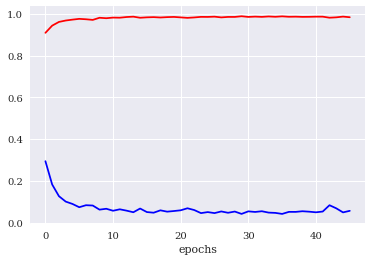

In [28]:
acc = hist.history['val_acc']
loss = hist.history['val_loss']

plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(len(loss)), loss, label='loss', color='blue')
plt.plot(range(len(acc)), acc, label='acc', color='red')
plt.xlabel('epochs')
plt.show()

## 予測精度の評価

In [29]:
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 11s 1ms/step
[0.07001748875972698, 0.9822]


この画像データのラベルは3です。


array([[0.00002549441342125647, 0.00008204823825508356,
        0.14743362367153167725, 0.85239017009735107422,
        0.00000651806931273313, 0.00003918525180779397,
        0.00000030165386988301, 0.00000143035322253127,
        0.00000095124897825372, 0.00002027293339779135]], dtype=float32)

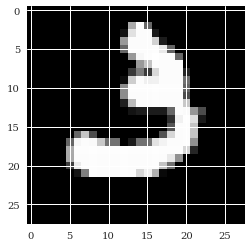

In [30]:
plt.imshow(np.array(X_train[0], dtype=np.float32).reshape(28, 28), cmap='gray')
print('この画像データのラベルは{:0d}です。'.format(np.argmax(Y_train[0])))

predict = model.predict(X_train[0:1], batch_size=1)
np.set_printoptions(precision=20, floatmode='fixed', suppress=True)
predict

# 終了処理

In [0]:
 backend.clear_session()